# Работа с API YandexART

In [1]:
import requests
import json
import time
from datetime import datetime
from IPython import display
from base64 import b64decode

Для работы с API YandexART необходим API-ключ для сервисного аккаунта Яндекс.Облака с ролями 'ai.languageModels.user' и 'ai.imageGeneration.user'.

Подробнее о создании API-ключа: https://yandex.cloud/ru/docs/iam/concepts/authorization/api-key

Необходимо указать ID каталога в Яндекс.Облаке и секрет созданного API-ключа

In [2]:
yandex_cloud_catalog = "b1glihj9h7pkj7mnd6at"
yandex_api_key = "AQVNyJRotHlHIhGec5YfWrslmo8tsbsc8eatOf_V"

Параметры генерации
- temperature: чем выше значение этого параметра, тем более креативными и случайными будут ответы модели. Принимает значения от 0 до 1. Значение по умолчанию: 0.3
- seed: инициализатор случайных чисел. Одинаковые значения будут приводить к генерации одинаковых картинок для одних и тех же запросов. Принимает значение от 0 до 2^64 - 1
- prompt: запрос для генерации картинки

In [3]:
temperature = 0.9
seed = int(round(datetime.now().timestamp()))
prompt = "Самый милый в мире пушистый котенок программист пьёт молоко, высокая детализация, высокое разрешение,  крупный план, глубина, гиперреализм, Octane render,f/2.8, ISO 200"

Выполнение запроса на генерацию картинки в асинхронном режиме. Генерация может выполняться до 1 минуты. В результате выполнения запроса получаем operation_id, с помощью которого можно получать результат, выполнив отдельный запрос

In [4]:
body = {
    "modelUri": f"art://{yandex_cloud_catalog}/yandex-art/latest",
    "generationOptions": {"seed": seed, "temperature": temperature},
    "messages": [
        {"weight": 1, "text": prompt},
    ],
}

url = "https://llm.api.cloud.yandex.net/foundationModels/v1/imageGenerationAsync"
headers = {"Authorization": f"Api-Key {yandex_api_key}"}

response = requests.post(url, headers=headers, json=body)
response_json = json.loads(response.text)
print(response_json)
operation_id = response_json["id"]

{'id': 'fbvesm77f257bb2fmoci', 'description': '', 'createdAt': None, 'createdBy': '', 'modifiedAt': None, 'done': False, 'metadata': None}


Необходимо дождаться выполнения генерации, результат придет в кодировке Base64

/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAYEBAQFBAYFBQYJBgUGCQsIBgYICwwKCgsKCgwQDAwMDAwMEAwODxAPDgwTExQUExMcGxsbHB8fHx8fHx8fHx//2wBDAQcHBw0MDRgQEBgaFREVGh8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx//wAARCAQABAADAREAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDxwPXmnuDw9ADg9IY8NRcBwai4hc07hYUNTuKwZp3FYKdyQzVXFYTNO5LQmadyWg71SZLQmaaZLQmapMloKpMloM1VyGgyTVJktCZqrk8oU7k2Ep3FYT+VO5PKIc07isNNFwsNNO4rDWouKxG1AWI2FAEDigCCSgCtJSGQGkAU

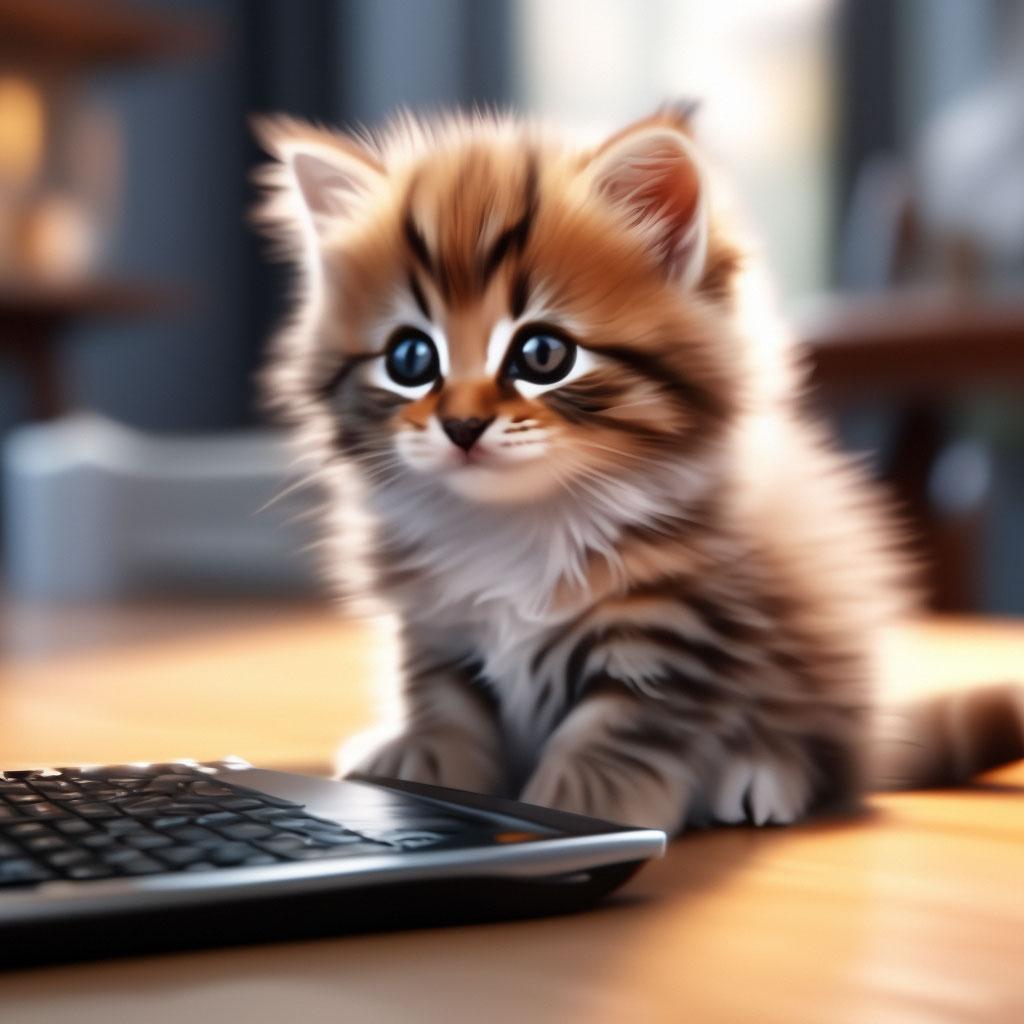

In [6]:
url = f"https://llm.api.cloud.yandex.net:443/operations/{operation_id}"
headers = {"Authorization": f"Api-Key {yandex_api_key}"}

while True:
    response = requests.get(url, headers=headers)
    response_json = json.loads(response.text)
    done = response_json["done"]
    if done:
        break
    else:
        time.sleep(2)
print(response_json["response"]["image"])
image_data = response_json["response"]["image"]
display.Image(b64decode(image_data))